01 - Tratamento dos dados da base K2.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from functions import *

Tratamento das colunas

In [20]:
k2 = pd.read_csv('./data/k2/k2.csv')

k2_columns = [
    'disposition',
    'ra',
    'dec',
    'st_teff',
    'st_rad',
    'pl_rade',
    'pl_eqt',
    'sy_dist',
    'st_logg',
    'pl_orbper',
    'pl_insol'
]

k2_data = k2[k2_columns].copy()

k2_columns_name = {
    'disposition': 'classification',
    'ra' : 'longitude',
    'dec' : 'latitude',
    'st_teff' : 'stellar_temperature',
    'st_rad' : 'stellar_radius',
    'pl_rade' : 'planet_radius',
    'pl_eqt' : 'eq_temperature',
    'sy_dist' : 'distance',
    'st_logg' : 'stellar_sur_gravity',
    'pl_orbper' : 'orbital_period',
    'pl_insol' : 'insol_flux'
}

k2_data.rename(columns=k2_columns_name, inplace=True)

k2_data.head(5)

,classification,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux
0,CONFIRMED,53.651123,20.599021,5766.00,1.08,2.578,NaN,179.4610,4.50,41.685500,NaN
1,CONFIRMED,53.651123,20.599021,5766.00,0.93,2.230,546.0,179.4610,4.50,41.685500,NaN
2,CONFIRMED,53.651123,20.599021,5703.00,0.96,2.355,NaN,179.4610,4.38,41.688644,NaN
3,CANDIDATE,183.846245,-6.268329,4616.52,0.76,1.120,1054.0,97.1795,4.54,2.301830,NaN
4,CANDIDATE,183.846245,-6.268329,4720.00,0.71,1.313,NaN,97.1795,4.50,2.302368,NaN


In [21]:
k2_data['mission'] = 'k2'

Calculo do campo depth

In [22]:
k2_data['depth'] = transit_depth(k2_data['planet_radius'], k2_data['stellar_radius'])

Visualizar

In [23]:
k2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       3773 non-null   object 
 1   longitude            3773 non-null   float64
 2   latitude             3773 non-null   float64
 3   stellar_temperature  2669 non-null   float64
 4   stellar_radius       3651 non-null   float64
 5   planet_radius        3016 non-null   float64
 6   eq_temperature       700 non-null    float64
 7   distance             3650 non-null   float64
 8   stellar_sur_gravity  2148 non-null   float64
 9   orbital_period       3734 non-null   float64
 10  insol_flux           513 non-null    float64
 11  mission              3773 non-null   object 
 12  depth                2975 non-null   float64
dtypes: float64(11), object(2)
memory usage: 383.3+ KB


Tratamento de INFINITOS em DISTANCE

In [24]:
k2_data['distance'] = np.where(k2_data['distance']==np.inf,np.nan,k2_data['distance'])

Tratamento de NULOS

In [25]:
colunas_dados_faltantes = ['stellar_temperature','stellar_radius','planet_radius','eq_temperature','distance','stellar_sur_gravity','orbital_period','insol_flux','depth']

Visualizar normalização dos dados

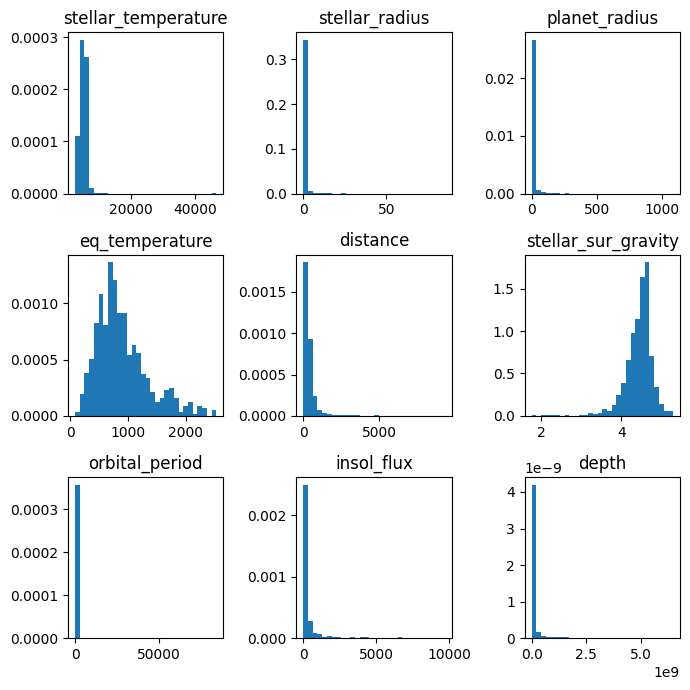

In [26]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)

ax[0,0].hist(k2_data.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')

ax[0,1].hist(k2_data.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')

ax[0,2].hist(k2_data.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')

ax[1,0].hist(k2_data.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')

ax[1,1].hist(k2_data[k2_data.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')

ax[1,2].hist(k2_data.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')

ax[2,0].hist(k2_data.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')

ax[2,1].hist(k2_data.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')

ax[2,2].hist(k2_data.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

In [27]:
dfx = k2_data.copy()
for coluna in colunas_dados_faltantes:
    dfx = imput_random(dfx,coluna)

In [28]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   classification       3773 non-null   object 
 1   longitude            3773 non-null   float64
 2   latitude             3773 non-null   float64
 3   stellar_temperature  3773 non-null   float64
 4   stellar_radius       3773 non-null   float64
 5   planet_radius        3773 non-null   float64
 6   eq_temperature       3773 non-null   float64
 7   distance             3773 non-null   float64
 8   stellar_sur_gravity  3773 non-null   float64
 9   orbital_period       3773 non-null   float64
 10  insol_flux           3773 non-null   float64
 11  mission              3773 non-null   object 
 12  depth                3773 non-null   float64
dtypes: float64(11), object(2)
memory usage: 383.3+ KB


Comparação

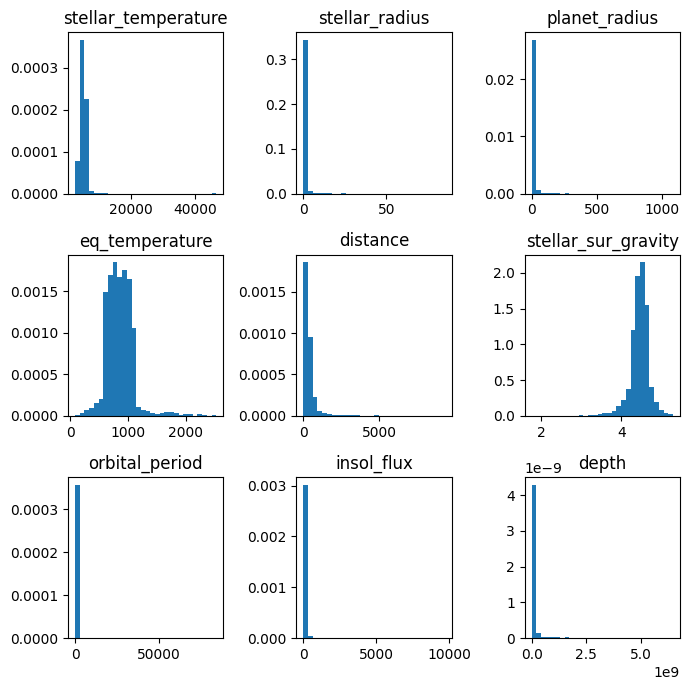

In [29]:
fig,ax = plt.subplots(3,3,figsize = (7,7),dpi = 100)
ax[0,0].hist(dfx.stellar_temperature,bins = 30,density = True)
ax[0,0].set_title('stellar_temperature')

ax[0,1].hist(dfx.stellar_radius,bins = 30,density = True)
ax[0,1].set_title('stellar_radius')

ax[0,2].hist(dfx.planet_radius,bins = 30,density = True)
ax[0,2].set_title('planet_radius')

ax[1,0].hist(dfx.eq_temperature,bins = 30,density = True)
ax[1,0].set_title('eq_temperature')

ax[1,1].hist(dfx[dfx.distance!=np.inf].distance,bins = 30,density = True) ## adicionei um filtro nesse plot, pois há dados de distance iguais a infinito
ax[1,1].set_title('distance')

ax[1,2].hist(dfx.stellar_sur_gravity,bins = 30,density = True)
ax[1,2].set_title('stellar_sur_gravity')

ax[2,0].hist(dfx.orbital_period,bins = 30,density = True)
ax[2,0].set_title('orbital_period')

ax[2,1].hist(dfx.insol_flux,bins = 30,density = True)
ax[2,1].set_title('insol_flux')

ax[2,2].hist(dfx.depth,bins = 30,density = True)
ax[2,2].set_title('depth')

plt.tight_layout()

Tratamento das classificações dos planetas

In [30]:
k2_data['classification'].value_counts()

mapeamento = {'CONFIRMED': 'planet', 'FALSE POSITIVE': 'not planet', 'CANDIDATE': 'candidate'}

k2_data['classification'] = k2_data['classification'].replace(mapeamento)

# Verifique se a substituição foi feita corretamente
print(k2_data['classification'].value_counts())

classification
planet        2092
candidate     1370
not planet     311
Name: count, dtype: int64


Corrigir ordem das colunas

In [31]:
len(k2_data.columns)

13

In [32]:
k2_data.columns

Index(['classification', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'insol_flux', 'mission',
       'depth'],
      dtype='object')

In [33]:
colunas = ['classification', 'mission', 'longitude', 'latitude', 'stellar_temperature',
       'stellar_radius', 'planet_radius', 'eq_temperature', 'distance',
       'stellar_sur_gravity', 'orbital_period', 'insol_flux',
       'depth']

k2_data = k2_data.reindex(columns=colunas)

Escalonamento com MinMaxScaler() onde a 1a coluna mantida no lugar e as demais escalonadas dentro dos seus próprios limites cada

In [34]:
k2_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,k2,53.651123,20.599021,5766.00,1.08,2.578,NaN,179.4610,4.50,41.685500,NaN,5.697946e+06
1,planet,k2,53.651123,20.599021,5766.00,0.93,2.230,546.0,179.4610,4.50,41.685500,NaN,5.749682e+06
2,planet,k2,53.651123,20.599021,5703.00,0.96,2.355,NaN,179.4610,4.38,41.688644,NaN,6.017822e+06
3,candidate,k2,183.846245,-6.268329,4616.52,0.76,1.120,1054.0,97.1795,4.54,2.301830,NaN,2.171745e+06
4,candidate,k2,183.846245,-6.268329,4720.00,0.71,1.313,NaN,97.1795,4.50,2.302368,NaN,3.419895e+06


In [35]:
scaler = MinMaxScaler()

k2_scaled = k2_data.copy()

cols_to_scale = k2_scaled.columns[1:] ## isso define as colunas a escalonar, mas nao tira a coluna categorica mission
col_to_skip = 'mission'
cols_to_scale = cols_to_scale.drop(col_to_skip) ## isso retira a coluna mission da lista de colunas a serem escalonadas

k2_scaled[cols_to_scale] = scaler.fit_transform(k2_scaled[cols_to_scale].values) ## isso escalona as colunas a serem escalonadas

k2_scaled_data = pd.DataFrame(k2_scaled, columns=k2_scaled.columns)
k2_scaled_data.head(5)

,classification,mission,longitude,latitude,stellar_temperature,stellar_radius,planet_radius,eq_temperature,distance,stellar_sur_gravity,orbital_period,insol_flux,depth
0,planet,k2,0.129039,0.872136,0.073479,0.011427,0.002012,NaN,0.018901,0.777778,0.000495,NaN,0.000822
1,planet,k2,0.129039,0.872136,0.073479,0.009660,0.001690,0.189620,0.018901,0.777778,0.000495,NaN,0.000830
2,planet,k2,0.129039,0.872136,0.072053,0.010013,0.001805,NaN,0.018901,0.743590,0.000495,NaN,0.000872
3,candidate,k2,0.502759,0.414973,0.047458,0.007657,0.000661,0.397221,0.010069,0.789174,0.000025,NaN,0.000276
4,candidate,k2,0.502759,0.414973,0.049801,0.007068,0.000840,NaN,0.010069,0.777778,0.000025,NaN,0.000469


In [36]:
k2_scaled_data.to_pickle('data\\k2\\k2_data_treated.pkl')